In [1]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd

# Load ESC-50 dataset and extract MFCC features
def load_audio_files(directory, sample_rate=22050, n_mfcc=13):
    audio_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            y, sr = librosa.load(file_path, sr=sample_rate)

            # Extract MFCC features
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            mfccs_mean = np.mean(mfccs.T, axis=0)  # Average MFCC over time
            audio_data.append(mfccs_mean)
    return np.array(audio_data), sr

# Directory where ESC-50 is located
directory = "C:\\Users\\prana\\Downloads\\ESC-50-master\\ESC-50-master\\audio"
audio_data, sr = load_audio_files(directory)

# Standardize data by centering (mean subtraction)
mean_audio = np.mean(audio_data, axis=0)
audio_data_centered = audio_data - mean_audio

# Compute covariance matrix
cov_matrix = np.dot(audio_data_centered.T, audio_data_centered) / (audio_data_centered.shape[0] - 1)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Project data onto the principal components
pca_data = np.dot(audio_data_centered, sorted_eigenvectors)

# Play the first audio after PCA (using first principal component)
sd.play(pca_data[:, 0], sr)
sd.wait()  # Wait until the audio finishes playing


c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


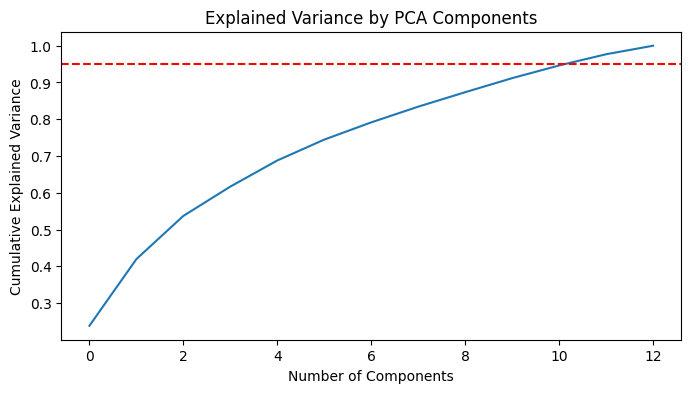

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Path to the UrbanSound8K dataset
dataset_path = "C:\\Users\\prana\\Downloads\\archive (2)"

# Initialize list to store features and labels
features = []
labels = []

# Loop over each subfolder (fold) in the dataset
for fold in range(1, 11):
    fold_path = os.path.join(dataset_path, f'fold{fold}')
    
    for file_name in os.listdir(fold_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(fold_path, file_name)
            
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)
            
            # Extract MFCC features (13 coefficients)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            
            # Take the mean of the MFCCs across the time axis (axis=1)
            mfccs_mean = np.mean(mfccs, axis=1)
            
            # Append the features and label (assuming labels can be extracted from file_name)
            features.append(mfccs_mean)
            labels.append(file_name.split('-')[1])  # Example: assuming the label is part of the file name

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Step 1: Standardize the features
features_mean = np.mean(features, axis=0)
features_std = np.std(features, axis=0)
features_standardized = (features - features_mean) / features_std

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(features_standardized.T)

# Step 3: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Step 5: Select the number of components (e.g., retain 95% of the variance)
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the number of components needed to retain 95% of the variance
n_components = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1

# Select the top n_components eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Step 6: Project the data onto the selected eigenvectors (i.e., the principal components)
features_pca = np.dot(features_standardized, selected_eigenvectors)

# Optional: Plot the cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# The features_pca now contains the data projected onto the principal components.


In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from pydub import AudioSegment

# Function to perform manual PCA
def manual_pca(X, n_components):
    # Step 1: Center the data
    X_meaned = X - np.mean(X, axis=0)
    
    # Step 2: Compute covariance matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort eigenvalues and eigenvectors
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    
    # Step 5: Select a subset of the eigenvectors (n_components)
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
    
    # Step 6: Project the data onto the selected eigenvectors
    X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T
    
    # Reconstruct the data
    X_reconstructed = np.dot(X_reduced, eigenvector_subset.T) + np.mean(X, axis=0)
    
    return X_reconstructed

# Load the audio file from the uploaded video
audio_file = "C:\\Users\\prana\\Downloads\\final_new_auido.mp4"
audio = AudioSegment.from_file(audio_file, format="mp4")

# Export audio as wav format
audio.export("C:\\Users\\prana\\Downloads\\final_wav_auido", format="wav")

# Load the wav file using librosa
y, sr = librosa.load("C:\\Users\\prana\\Downloads\\final_wav_auido.wav", sr=None)

# Convert audio signal to spectrogram
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S))

# Flatten the spectrogram
S_db_flattened = S_db.flatten()

# Apply manual PCA
S_db_cleaned = manual_pca(S_db_flattened.reshape(-1, 1), n_components=10)
S_db_cleaned = S_db_cleaned.reshape(S_db.shape)

# Convert cleaned spectrogram back to audio
S_cleaned = librosa.db_to_amplitude(S_db_cleaned)
y_cleaned = librosa.istft(S_cleaned)

# Save the cleaned audio as WAV
cleaned_wav_path = "C:\\Users\\prana\\Downloads\\final_cleaned_wav_auido.wav"
sf.write(cleaned_wav_path, y_cleaned, sr)

# Convert cleaned WAV to MP3
cleaned_mp3_path = "C:\\Users\\prana\\Downloads\\final_cleaned_mp3_auido.mp3"
audio_segment = AudioSegment.from_wav(cleaned_wav_path)
audio_segment.export(cleaned_mp3_path, format="mp3")

# Display the original and cleaned spectrograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Original Spectrogram')

plt.subplot(1, 2, 2)
librosa.display.specshow(S_db_cleaned, sr=sr, x_axis='time', y_axis='log')
plt.title('Cleaned Spectrogram (Manual PCA)')

plt.show()

cleaned_wav_path, cleaned_mp3_path


FileNotFoundError: [WinError 2] The system cannot find the file specified